In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data import
main_df = pd.read_csv('../dataset/netflix_titles.csv')
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 데이터 살펴보기

In [3]:
# 결측치 수
main_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# 유티크한 데이터 수
main_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# 결측치 삭제


- 시간 변화에 따른 흐름을 보고자 한다.
- 2016년도 이후 급격히 데이터가 늘어나, 시간 순서대로 보기에는 어려움이 있다.
- 따라서, 10개 구간으로 나눈 후 변화의 추이를 보고자 한다.


- 전체 데이터 8807개를 10개 구간으로 나누기 위해서 결측치 17개를 삭제한다.
- date_added, rating, duration 3가지 항목을 삭제한다.


- country의 경우 우선은 두고, 다른 방법으로 살펴볼 수 있도록 한다.

In [5]:
# date_added 10개 행 삭제
main_df = main_df[main_df['date_added'].notna()]

# rating 4개 행 삭제
main_df = main_df[main_df['rating'].notna()]

# duration 3개 행 삭제
main_df = main_df[main_df['duration'].notna()]

main_df.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# 데이터 타입 변환

In [6]:
main_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

- date_added 는 datatime으로 변경한다.

In [7]:
main_df['date_added'] = main_df['date_added'].astype('datetime64')
main_df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

# 데이터 병합하기

### NetflixOriginals.csv 
### 데이터 불러오기

In [8]:
original_df = pd.read_csv('../dataset/NetflixOriginals.csv')
original_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,5.Aug.19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21.Aug.20,81,2.6,Spanish
2,The App,Science fiction/Drama,26.Dec.19,79,2.6,Italian
3,The Open House,Horror thriller,19.Jan.18,94,3.2,English
4,Kaali Khuhi,Mystery,30.Oct.20,90,3.4,Hindi


### 데이터 타입 변환

- Premiere를 datatime으로 변환한다.

In [9]:
original_df['Premiere'] = original_df['Premiere'].astype('datetime64')
original_df['Premiere']

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Premiere, Length: 584, dtype: datetime64[ns]

### columns 삭제, 이름 변경

- main_df와 병합을 title을 기준으로 할 것이기 때문에 Title 을 title로 변경한다.
- Genre, Premiere, Runtime은 main_df와 동일한 것이기 때문에 삭제한다.

In [10]:
# 열삭제
original_df = original_df.drop(['Genre', 'Premiere', 'Runtime'], axis=1)
original_df.head()

,Title,IMDB Score,Language
0,Enter the Anime,2.5,English/Japanese
1,Dark Forces,2.6,Spanish
2,The App,2.6,Italian
3,The Open House,3.2,English
4,Kaali Khuhi,3.4,Hindi


In [11]:
# 이름 변경
original_df.columns = ['title', 'imdb score', 'language']
original_df

,title,imdb score,language
0,Enter the Anime,2.5,English/Japanese
1,Dark Forces,2.6,Spanish
2,The App,2.6,Italian
3,The Open House,3.2,English
4,Kaali Khuhi,3.4,Hindi
...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,8.6,Portuguese


### main_df 와 original_df 병합하기

In [12]:
# main_df와 original_df 교집합 데이터
onlyoriginal = pd.merge(main_df, original_df)
onlyoriginal

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb score,language
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.5,English
1,s142,Movie,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",2021-09-01,2015,R,82 min,Action & Adventure,"When a retired CIA agent is kidnapped, his son...",6.7,English
2,s625,Movie,Prime Time,Jakub Piątek,"Bartosz Bielenia, Magdalena Popławska, Andrzej...",NaN,2021-06-30,2021,TV-MA,92 min,"Dramas, International Movies, Thrillers","On New Year’s Eve 1999, an armed man enters a ...",5.7,Polish
3,s835,Movie,Blue Miracle,Julio Quintana,"Jimmy Gonzales, Dennis Quaid, Anthony Gonzalez...",United States,2021-05-27,2021,TV-PG,97 min,"Children & Family Movies, Dramas, Faith & Spir...","To save their cash-strapped orphanage, a guard...",6.7,English
4,s837,Movie,Ghost Lab,Paween Purijitpanya,"Thanapob Leeratanakachorn, Paris Intarakomalya...",Thailand,2021-05-27,2021,TV-MA,118 min,"Horror Movies, International Movies, Thrillers","After witnessing a haunting in their hospital,...",5.2,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,s5902,Movie,Tig,"Kristina Goolsby, Ashley York",Tig Notaro,United States,2015-07-17,2015,TV-14,92 min,"Documentaries, Stand-Up Comedy",Comedian Tig Notaro announced her cancer diagn...,7.4,English
499,s5907,Movie,"What Happened, Miss Simone?",Liz Garbus,NaN,United States,2015-06-26,2015,TV-14,103 min,"Documentaries, Music & Musicals","Using never-before-heard recordings, rare arch...",7.6,English
500,s5911,Movie,Hot Girls Wanted,"Jill Bauer, Ronna Gradus",NaN,United States,2015-05-29,2015,TV-MA,83 min,Documentaries,This 2015 Sundance Film Festival breakout docu...,6.1,English
501,s5913,Movie,The Other One: The Long Strange Trip of Bob Weir,Mike Fleiss,Bob Weir,United States,2015-05-22,2015,TV-14,84 min,"Documentaries, Music & Musicals",This chronicle of Bob Weir highlights his brot...,7.3,English


In [13]:
# onlyoriginal csv 파일로 저장
onlyoriginal.to_csv('onlyoriginal.csv')

***
### main_df 지역별로 묶기
- 대륙별 수익 데이터와 연결하기 위해 main_df의 country의 값을 대륙별로 정리한다.

In [14]:
main_df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

- 하고싶은 것: '대륙별 수익과 구독자 수 변화'와 '넷플릭스에서 대륙별로 제작하는 콘텐츠 수 변화'를 함께 비교해보고 싶다.
- country의 unique값이 너무 많고, 공동 제작한 작품이 많기 때문에 정리가 필요하다.
- country의 국가를 먼저 split(',')으로 나누고, 대륙별로 리스트에 넣은 다음, date_added와 함께 데이터프레임을 만든다.
- '대륙별 수익과 구독자 수' 데이터셋에는 년도만 기준으로 나오기 때문에 date_added를 년도만 추출한다.

In [15]:
country = [] # 나라
date_added = [] # 추가된 날
cont = [] # 대륙

us_canada = ['United States', 'Canada']
eu_me_af = ['Vatican City', 'Gibraltar', 'San Marino', 'Liechtenstein', 'Monaco',
            'Faroe Islands', 'Andorra', 'Isle of Man', 'Seychelles', 'Mayotte',
            'Iceland', 'Malta', 'Cape Verde', 'Western Sahara', 'Montenegro',
            'Luxembourg', 'Comoros', 'Reunion', 'Djibouti', 'Cyprus',
            'Mauritius', 'Estonia', 'Equatorial Guinea', 'Bahrain', 'Latvia',
            'Guinea Bissau', 'Slovenia', 'Lesotho', 'Gabon', 'Botswana',
            'Gambia', 'Namibia', 'Lithuania', 'Albania', 'Qatar',
            'Bosnia And Herzegovina', 'Eritrea', 'Georgia', 'Moldova', 'Croatia',
            'Kuwait', 'Mauritania', 'Central African Republic', 'Ireland', 'Liberia',
            'Oman', 'Palestine', 'Slovakia', 'Norway', 'Finland', 'Republic of the Congo',
            'Denmark', 'Lebanon', 'Bulgaria', 'Libya', 'Sierra Leone', 'Serbia',
            'Togo', 'Switzerland', 'Israel', 'Austria', 'Belarus',
            'Hungary', 'United Arab Emirates', 'Portugal', 'Sweden', 'Jordan',
            'Greece', 'Czech Republic', 'Belgium', 'Tunisia', 'Burundi',
            'Benin', 'Rwanda', 'Guinea', 'Zimbabwe', 'Somalia', 'Netherlands',
            'Chad', 'Senegal', 'Romania', 'Syria', 'Zambia', 'Malawi',
            'Mali', 'Burkina Faso', 'Niger', 'Ivory Coast', 'Cameroon',
            'Madagascar', 'Yemen', 'Ghana', 'Mozambique', 'Angola', 'Saudi Arabia',
            'Poland', 'Morocco', 'Iraq', 'Ukraine', 'Algeria', 'Sudan', 'Spain',
            'Uganda', 'Kenya', 'Italy', 'South Africa', 'Tanzania', 'France', 'United Kingdom',
            'Germany', 'Turkey', 'Iran', 'DR Congo', 'Egypt', 'Ethiopia', 'Russia', 'Nigeria']
la = ['Puerto Rico', 'Uruguay', 'Panama', 'Costa Rica', 'El Salvador', 'Nicaragua', 'Paraguay',
      'Honduras', 'Dominican Republic', 'Cuba', 'Bolivia', 'Ecuador', 'Guatemala', 'Chile', 'Venezuela',
      'Peru', 'Argentina', 'Colombia', 'Mexico', 'Brazil']
ap = ['Niue', 'Nauru', 'Tuvalu', 'Cook Islands', 'Palau', 'Northern Mariana Islands', 'Marshall Islands',
      'Tonga', 'Micronesia', 'Kiribati', 'Guam', 'Samoa', 'French Polynesia', 'New Caledonia', 
      'Vanuatu', 'Brunei', 'Maldives', 'Macau', 'Solomon Islands', 'Bhutan', 'Fiji', 'Timor-Leste', 'Armenia',
      'Mongolia', 'Georgia', 'New Zealand', 'Singapore', 'Turkmenistan', 'Kyrgyzstan', 'Laos',
      'Hong Kong', 'Papua New Guinea', 'Tajikistan', 'Azerbaijan', 'Cambodia', 'Kazakhstan', 'Chile', 'Sri Lanka',
      'North Korea', 'Australia', 'Nepal', 'Malaysia', 'Peru', 'Uzbekistan', 'Canada', 'Afghanistan',
      'South Korea', 'Myanmar', 'Thailand', 'Turkey', 'Iran', 'Vietnam', 'Philippines', 'Japan',
      'Mexico', 'Russia', 'Bangladesh', 'Pakistan', 'Indonesia', 'United States', 'India', 'China']

In [16]:
country = [] # 나라
date_added = [] # 추가된 날
cont = [] # 대륙

main_df['country'] = main_df['country'].fillna('Unknown')

length = len(main_df)

for x in range(0, length):
    row = main_df[x:x+1]
    countrylist = list(row['country'])
    for i in countrylist:
        i = list(i.split(','))
        i[0] = i[0].strip()
        if len(i) == 1:
            if i[0] in us_canada:
                country.append(i[0])
                date_added.append(row['date_added'])
                cont.append('United States and Canada')
            elif i[0] in eu_me_af:
                country.append(i[0])
                date_added.append(row['date_added'])
                cont.append('Europe, Middle East, and Africa')               
            elif i[0] in la:
                country.append(i[0])
                date_added.append(row['date_added'])
                cont.append('Latin America')               
            elif i[0] in ap:
                country.append(i[0])
                date_added.append(row['date_added'])
                cont.append('Asia-Pacific')               
            else:
                pass
        else:
            for j in i:
                j = j.strip()
                if j in us_canada:
                    country.append(j)
                    date_added.append(row['date_added'])
                    cont.append('United States and Canada')
                elif j in eu_me_af:
                    country.append(j)
                    date_added.append(row['date_added'])
                    cont.append('Europe, Middle East, and Africa')                                                        
                elif j in la:
                    country.append(j)
                    date_added.append(row['date_added'])
                    cont.append('Latin America')                                    
                elif j in ap:
                    country.append(j)
                    date_added.append(row['date_added'])
                    cont.append('Asia-Pacific')                                   
                else:
                    pass
            
print(len(country))
print(len(date_added))
print(len(cont))

9894
9894
9894


In [17]:
# 날짜별 대륙 영화 추가된 데이터
cont_df = pd.DataFrame({
    'country' : country,
    'date_added' : [str(date).split('\n')[0][-10:-6] for date in date_added],
    'cont' : cont
}, columns=['date_added', 'cont', 'country'])

cont_df

,date_added,cont,country
0,2021,United States and Canada,United States
1,2021,"Europe, Middle East, and Africa",South Africa
2,2021,Asia-Pacific,India
3,2021,United States and Canada,United States
4,2021,"Europe, Middle East, and Africa",Ghana
...,...,...,...
9889,2016,"Europe, Middle East, and Africa",Jordan
9890,2019,United States and Canada,United States
9891,2019,United States and Canada,United States
9892,2020,United States and Canada,United States


In [18]:
# cont_df .csv 파일로 저장하기
cont_df.to_csv('cont_df.csv')

In [19]:
main_df.to_csv('main_df.csv')

***

# 넷플릭스 오리지널 콘텐츠 추가에 대한 변화 분석

- 가설1) 새로운 OTT 서비스가 증가함에 따라 구독자 수를 잡기 위해 오리지널 콘텐츠보다 오리지널 콘텐츠가 아닌 콘텐츠를 더 증가시켰다.
- 가설2) 새로운 국가의 구독자수를 증가시키기 위해 다양한 국가의 오리지널 콘텐츠를 제작하였다.

In [20]:
onlyoriginal.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb score,language
498,s5902,Movie,Tig,"Kristina Goolsby, Ashley York",Tig Notaro,United States,2015-07-17,2015,TV-14,92 min,"Documentaries, Stand-Up Comedy",Comedian Tig Notaro announced her cancer diagn...,7.4,English
499,s5907,Movie,"What Happened, Miss Simone?",Liz Garbus,NaN,United States,2015-06-26,2015,TV-14,103 min,"Documentaries, Music & Musicals","Using never-before-heard recordings, rare arch...",7.6,English
500,s5911,Movie,Hot Girls Wanted,"Jill Bauer, Ronna Gradus",NaN,United States,2015-05-29,2015,TV-MA,83 min,Documentaries,This 2015 Sundance Film Festival breakout docu...,6.1,English
501,s5913,Movie,The Other One: The Long Strange Trip of Bob Weir,Mike Fleiss,Bob Weir,United States,2015-05-22,2015,TV-14,84 min,"Documentaries, Music & Musicals",This chronicle of Bob Weir highlights his brot...,7.3,English
502,s5917,Movie,My Own Man,David Sampliner,David Sampliner,United States,2015-03-06,2015,TV-MA,82 min,Documentaries,When a man discovers he will be the father to ...,6.4,English


In [21]:
# print(str(onlyoriginal['date_added'][502]).split('-')[0])

# [str(date).split('\n')[0][-10:-6] for date in date_added]
onlyoriginal['year_added'] = [str(date).split('-')[0] for date in onlyoriginal['date_added']]
onlyoriginal.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb score,language,year_added
498,s5902,Movie,Tig,"Kristina Goolsby, Ashley York",Tig Notaro,United States,2015-07-17,2015,TV-14,92 min,"Documentaries, Stand-Up Comedy",Comedian Tig Notaro announced her cancer diagn...,7.4,English,2015
499,s5907,Movie,"What Happened, Miss Simone?",Liz Garbus,NaN,United States,2015-06-26,2015,TV-14,103 min,"Documentaries, Music & Musicals","Using never-before-heard recordings, rare arch...",7.6,English,2015
500,s5911,Movie,Hot Girls Wanted,"Jill Bauer, Ronna Gradus",NaN,United States,2015-05-29,2015,TV-MA,83 min,Documentaries,This 2015 Sundance Film Festival breakout docu...,6.1,English,2015
501,s5913,Movie,The Other One: The Long Strange Trip of Bob Weir,Mike Fleiss,Bob Weir,United States,2015-05-22,2015,TV-14,84 min,"Documentaries, Music & Musicals",This chronicle of Bob Weir highlights his brot...,7.3,English,2015
502,s5917,Movie,My Own Man,David Sampliner,David Sampliner,United States,2015-03-06,2015,TV-MA,82 min,Documentaries,When a man discovers he will be the father to ...,6.4,English,2015


In [22]:
onlyoriginal['year_added'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015'],
      dtype=object)

- 오리지널 콘텐츠의 증감 추이를 살펴보자

In [23]:
count_year = pd.value_counts(onlyoriginal['year_added'])
count_year = count_year.sort_index(ascending = True)
count_year

2015     10
2016     27
2017     54
2018     81
2019    105
2020    162
2021     64
Name: year_added, dtype: int64

No handles with labels found to put in legend.


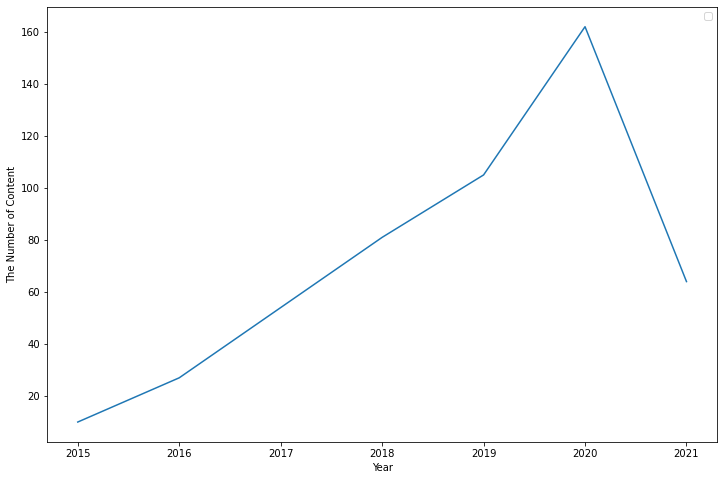

In [24]:
plt.figure(figsize = (12, 8))

sns.lineplot(data=count_year, x=count_year.index, y=count_year.values)

plt.legend()
plt.xlabel('Year')
plt.ylabel('The Number of Content')
plt.show()

- 2021년도 작품은 데이터셋에 다 반영되지 않았다.

In [25]:
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
main_df['year_added'] = [str(date).split('-')[0] for date in main_df['date_added']]
main_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019


In [27]:
main_df['year_added'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2010'], dtype=object)

In [28]:
count_year2 = pd.value_counts(main_df['year_added'])
count_year2 = count_year2.sort_index(ascending = True)
count_year2

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64

### main_df 와 original_df 와의 차집합 구하기

In [29]:
original_title = onlyoriginal['title']
print(len(original_title))
original_title[0]

503


'Dick Johnson Is Dead'

In [30]:
# onlyoriginal['title'][0]
# onlyoriginal.iloc[0]['title']

# onlyoriginal = onlyoriginal.groupby(['year_added', 'title'], as_index=False)
# onlyoriginal.style.hide_index()
# len(main_df['title'].values[:])
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [31]:
main_df['original'] = False

In [32]:
for idx, row in main_df.iterrows():
    if main_df['title'][idx] in onlyoriginal['title'].values:
        main_df['original'][idx] = True
    else:
        main_df['original'][idx] = False
        
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,original
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,True
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,False
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,False
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,False


- 오리지널이 아닌 넷플릭스 작품 추출하기

In [33]:
# count_year = pd.value_counts(onlyoriginal['year_added'])
# count_year = count_year.sort_index(ascending = True)
# count_year

notoriginal = main_df[main_df['original'] == False]
len(notoriginal)

8287

In [34]:
count_year2 = pd.value_counts(notoriginal['year_added'])
count_year2 = count_year2.sort_index(ascending = True)
notoriginal_count = pd.DataFrame(data=count_year2)
original_count = pd.DataFrame(data=count_year)

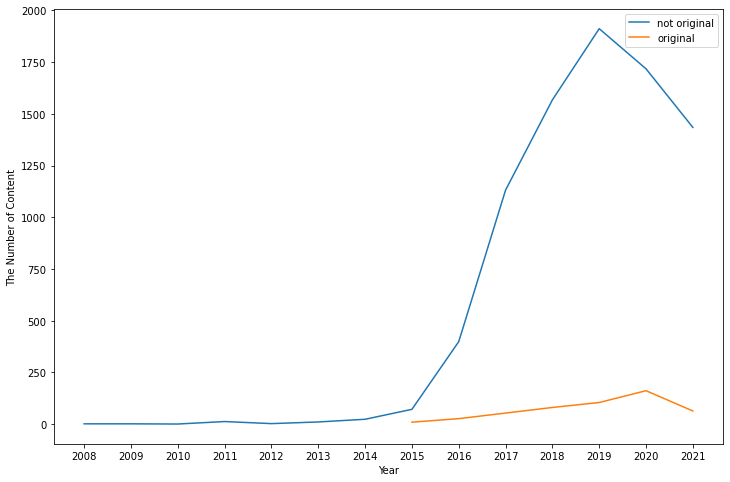

In [35]:
# 오리지널이 아닌 콘텐츠 수 증감 추이
plt.figure(figsize = (12, 8))

sns.lineplot(data=count_year2, x=count_year2.index, y=count_year2.values, label='not original')
sns.lineplot(data=count_year, x=count_year.index, y=count_year.values, label='original')

plt.legend()
plt.xlabel('Year')
plt.ylabel('The Number of Content')
plt.show()

In [36]:
# notoriginal_count
count_year2

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      72
2016     399
2017    1131
2018    1567
2019    1911
2020    1717
2021    1434
Name: year_added, dtype: int64

In [37]:
# 오리지널이 아닌 콘텐츠 증감률

rate1 = {}

for i in range(len(count_year2)-1):
    rate1[f'{count_year2.index[i]}~{count_year2.index[i+1]}'] = int((count_year2[i+1] - count_year2[i]) / count_year2[i] * 100)
    i += 1

# for i in range(len(count_year2)-1):
#     rate1[f'{i}구간'] = int((count_year2[i+1] - count_year2[i]) / count_year2[i] * 100)
#     i += 1
    
rate1

{'2008~2009': 0,
 '2009~2010': -50,
 '2010~2011': 1200,
 '2011~2012': -76,
 '2012~2013': 266,
 '2013~2014': 118,
 '2014~2015': 200,
 '2015~2016': 454,
 '2016~2017': 183,
 '2017~2018': 38,
 '2018~2019': 21,
 '2019~2020': -10,
 '2020~2021': -16}

In [38]:
count_year

2015     10
2016     27
2017     54
2018     81
2019    105
2020    162
2021     64
Name: year_added, dtype: int64

In [39]:
# 오리지널 콘텐츠 증감률

rate2 = {}

for i in range(len(count_year)-1):
    rate2[f'{count_year.index[i]}~{count_year.index[i+1]}'] = int((count_year[i+1] - count_year[i]) / count_year[i] * 100)
    i += 1

# for i in range(len(count_year)-1):
#     rate2[f'{i}구간'] = int((count_year[i+1] - count_year[i]) / count_year[i] * 100)
#     i += 1
    
rate2.keys()

dict_keys(['2015~2016', '2016~2017', '2017~2018', '2018~2019', '2019~2020', '2020~2021'])

In [40]:
rate11 = pd.DataFrame(rate1, index=[0])
a1 = rate11.values.flatten()
a1

array([   0,  -50, 1200,  -76,  266,  118,  200,  454,  183,   38,   21,
        -10,  -16])

In [41]:
rate22 = pd.DataFrame(rate2, index=[0])
a2 = rate22.values.flatten()

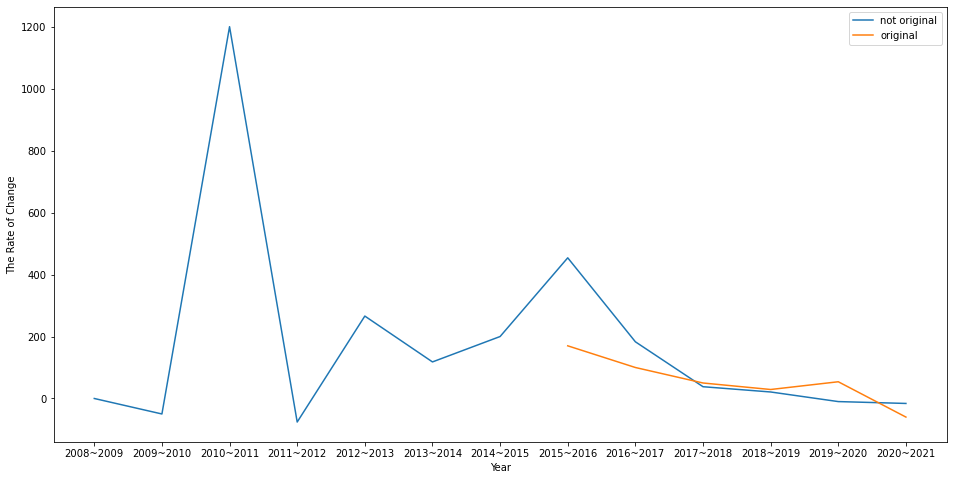

In [42]:
# 증감률 비교
plt.figure(figsize = (16, 8))
bar_width = 0.25

sns.lineplot(data=rate11.T, x=rate11.T.index, y=a1, label='not original')
sns.lineplot(data=rate22.T, x=rate22.T.index, y=a2, label='original')

plt.legend()
plt.xlabel('Year')
plt.ylabel('The Rate of Change')
plt.show()

***

### 오리지널 콘텐츠와 국가 상관관계

In [43]:
onlyoriginal.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb score,language,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.5,English,2021
1,s142,Movie,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",2021-09-01,2015,R,82 min,Action & Adventure,"When a retired CIA agent is kidnapped, his son...",6.7,English,2021
2,s625,Movie,Prime Time,Jakub Piątek,"Bartosz Bielenia, Magdalena Popławska, Andrzej...",NaN,2021-06-30,2021,TV-MA,92 min,"Dramas, International Movies, Thrillers","On New Year’s Eve 1999, an armed man enters a ...",5.7,Polish,2021
3,s835,Movie,Blue Miracle,Julio Quintana,"Jimmy Gonzales, Dennis Quaid, Anthony Gonzalez...",United States,2021-05-27,2021,TV-PG,97 min,"Children & Family Movies, Dramas, Faith & Spir...","To save their cash-strapped orphanage, a guard...",6.7,English,2021
4,s837,Movie,Ghost Lab,Paween Purijitpanya,"Thanapob Leeratanakachorn, Paris Intarakomalya...",Thailand,2021-05-27,2021,TV-MA,118 min,"Horror Movies, International Movies, Thrillers","After witnessing a haunting in their hospital,...",5.2,Thai,2021


In [44]:
onlyoriginal['country'] = onlyoriginal['country'].fillna('Unkown')
onlyoriginal

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb score,language,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.5,English,2021
1,s142,Movie,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",2021-09-01,2015,R,82 min,Action & Adventure,"When a retired CIA agent is kidnapped, his son...",6.7,English,2021
2,s625,Movie,Prime Time,Jakub Piątek,"Bartosz Bielenia, Magdalena Popławska, Andrzej...",Unkown,2021-06-30,2021,TV-MA,92 min,"Dramas, International Movies, Thrillers","On New Year’s Eve 1999, an armed man enters a ...",5.7,Polish,2021
3,s835,Movie,Blue Miracle,Julio Quintana,"Jimmy Gonzales, Dennis Quaid, Anthony Gonzalez...",United States,2021-05-27,2021,TV-PG,97 min,"Children & Family Movies, Dramas, Faith & Spir...","To save their cash-strapped orphanage, a guard...",6.7,English,2021
4,s837,Movie,Ghost Lab,Paween Purijitpanya,"Thanapob Leeratanakachorn, Paris Intarakomalya...",Thailand,2021-05-27,2021,TV-MA,118 min,"Horror Movies, International Movies, Thrillers","After witnessing a haunting in their hospital,...",5.2,Thai,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,s5902,Movie,Tig,"Kristina Goolsby, Ashley York",Tig Notaro,United States,2015-07-17,2015,TV-14,92 min,"Documentaries, Stand-Up Comedy",Comedian Tig Notaro announced her cancer diagn...,7.4,English,2015
499,s5907,Movie,"What Happened, Miss Simone?",Liz Garbus,NaN,United States,2015-06-26,2015,TV-14,103 min,"Documentaries, Music & Musicals","Using never-before-heard recordings, rare arch...",7.6,English,2015
500,s5911,Movie,Hot Girls Wanted,"Jill Bauer, Ronna Gradus",NaN,United States,2015-05-29,2015,TV-MA,83 min,Documentaries,This 2015 Sundance Film Festival breakout docu...,6.1,English,2015
501,s5913,Movie,The Other One: The Long Strange Trip of Bob Weir,Mike Fleiss,Bob Weir,United States,2015-05-22,2015,TV-14,84 min,"Documentaries, Music & Musicals",This chronicle of Bob Weir highlights his brot...,7.3,English,2015


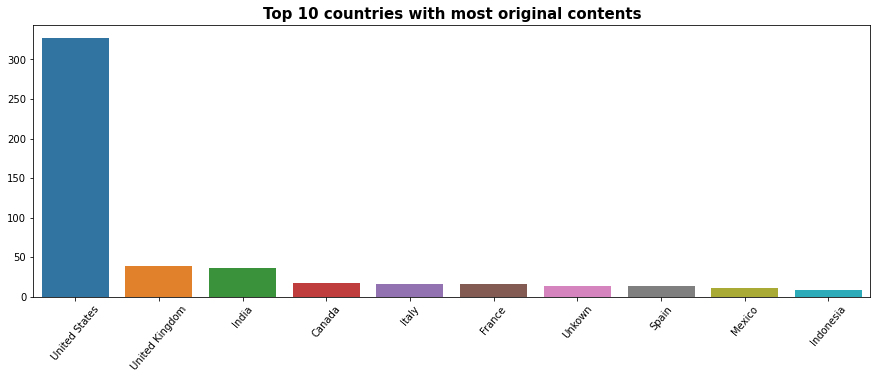

In [45]:
from collections import Counter

country_data = onlyoriginal['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)

top10country = country_count.head(10)

plt.figure(figsize = (15, 5))
sns.barplot(x=top10country.index, y=top10country)

plt.xticks(rotation=50)
plt.title('Top 10 countries with most original contents', fontsize=15, fontweight='bold')
plt.show()

***

# 국가(대륙)과 콘텐츠 상관관계 분석

In [48]:
cont_df.head()

,date_added,cont,country
0,2021,United States and Canada,United States
1,2021,"Europe, Middle East, and Africa",South Africa
2,2021,Asia-Pacific,India
3,2021,United States and Canada,United States
4,2021,"Europe, Middle East, and Africa",Ghana


In [49]:
cont_df['date_added'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2010'], dtype=object)

In [50]:
cont_year = pd.value_counts(cont_df['cont'])
cont_year = cont_year.sort_index(ascending = True)
cont_year

Asia-Pacific                       2411
Europe, Middle East, and Africa    2882
Latin America                       475
United States and Canada           4126
Name: cont, dtype: int64

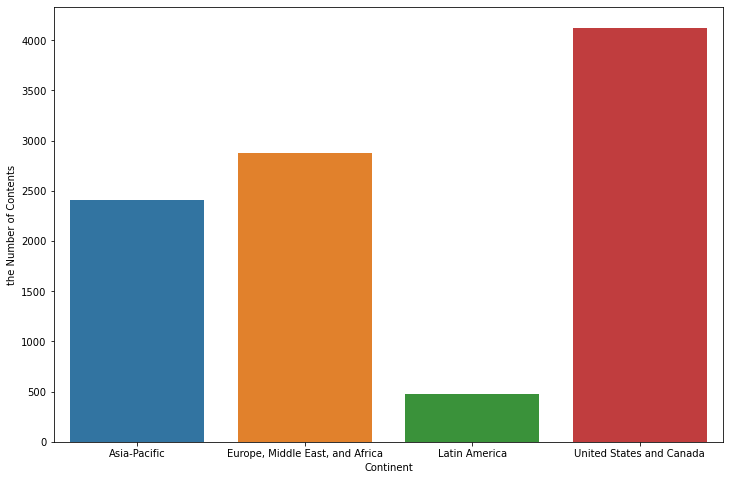

In [51]:
plt.figure(figsize = (12, 8))

sns.barplot(x=cont_year.index, y=cont_year)

plt.xlabel('Continent')
plt.ylabel('the Number of Contents')
plt.show()

In [52]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9894 entries, 0 to 9893
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_added  9894 non-null   object
 1   cont        9894 non-null   object
 2   country     9894 non-null   object
dtypes: object(3)
memory usage: 232.0+ KB


In [53]:
cont_df.tail()

,date_added,cont,country
9889,2016,"Europe, Middle East, and Africa",Jordan
9890,2019,United States and Canada,United States
9891,2019,United States and Canada,United States
9892,2020,United States and Canada,United States
9893,2019,Asia-Pacific,India


In [142]:
uscanada = cont_df[cont_df['cont'] == 'United States and Canada'].groupby('date_added').count()
eumda = cont_df[cont_df['cont'] == 'Europe, Middle East, and Africa'].groupby('date_added').count()
asia = cont_df[cont_df['cont'] == 'Asia-Pacific'].groupby('date_added').count()
latin = cont_df[cont_df['cont'] == 'Latin America'].groupby('date_added').count()

uscanada

,cont,country
date_added,,
2008,2,2
2009,1,1
2010,1,1
2011,12,12
2012,3,3
2013,11,11
2014,25,25
2015,63,63
2016,231,231


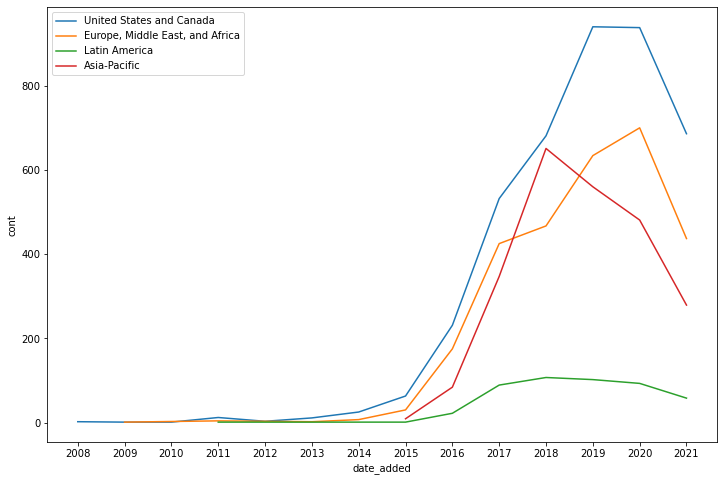

In [143]:
plt.figure(figsize = (12, 8))

sns.lineplot(data=uscanada, x=uscanada.index, y=uscanada['cont'], label='United States and Canada')
sns.lineplot(data=eumda, x=eumda.index, y=eumda['cont'], label='Europe, Middle East, and Africa')
sns.lineplot(data=latin, x=latin.index, y=latin['cont'], label='Latin America')
sns.lineplot(data=asia, x=asia.index, y=asia['cont'], label='Asia-Pacific')

plt.show()

In [144]:
uscanada = uscanada.drop(['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2021'])
uscanada = uscanada.drop(['country'], axis=1)
uscanada

,cont
date_added,
2018,681
2019,940
2020,938


In [145]:
eumda = eumda.drop(['2009','2011','2013','2014','2015','2016','2017','2021'])
eumda = eumda.drop(['country'], axis=1)
eumda

,cont
date_added,
2018,467
2019,634
2020,700


In [146]:
latin = latin.drop(['2011','2012','2014','2015','2016','2017','2021'])
latin = latin.drop(['country'], axis=1)
latin

,cont
date_added,
2018,107
2019,102
2020,93


In [147]:
asia = asia.drop(['2015','2016','2017','2021'])
asia = asia.drop(['country'], axis=1)
asia

,cont
date_added,
2018,651
2019,560
2020,481


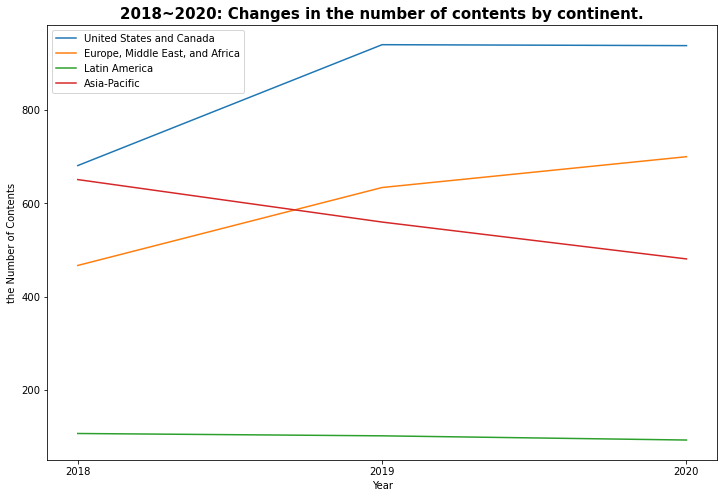

In [150]:
plt.figure(figsize = (12, 8))

sns.lineplot(data=uscanada, x=uscanada.index, y=uscanada['cont'], label='United States and Canada')
sns.lineplot(data=eumda, x=eumda.index, y=eumda['cont'], label='Europe, Middle East, and Africa')
sns.lineplot(data=latin, x=latin.index, y=latin['cont'], label='Latin America')
sns.lineplot(data=asia, x=asia.index, y=asia['cont'], label='Asia-Pacific')

plt.title('2018~2020: Changes in the number of contents by continent.', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('the Number of Contents')
plt.show()

In [112]:
revenue_df = pd.read_csv('../dataset/NetflixsRevenue2018toQ2_2020.csv')
revenue_df = revenue_df.set_index('Area').T
revenue_df = revenue_df.drop(['Q1 - 2018','Q2 - 2018','Q3 - 2018','Q1 - 2019','Q2 - 2019','Q3 - 2019','Q1 - 2020'], axis=0)
revenue_df.index = ['2018', '2019', '2020']
revenue_df

Area,United States and Canada,"Europe, Middle East, and Africa",Latin America,Asia-Pacific
2018,2160979000,1096812000,567137000,276756000
2019,2671908000,1562561000,746392000,418121000
2020,2839670000,1892537000,785368000,569140000


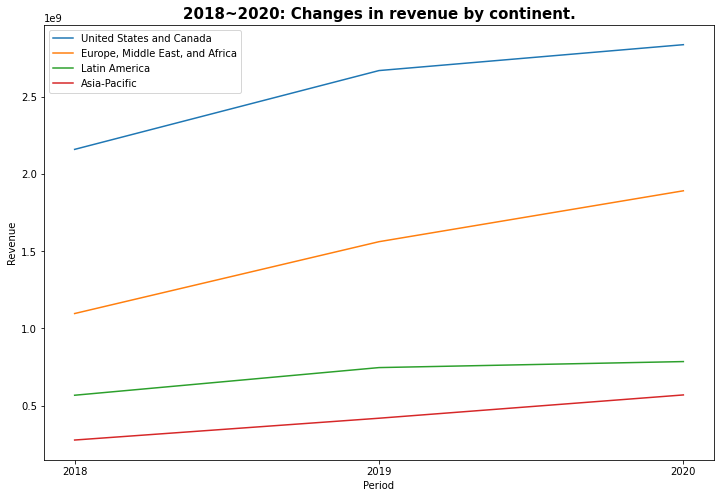

In [151]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=revenue_df, x=revenue_df.index, y=revenue_df['United States and Canada'], label='United States and Canada')
sns.lineplot(data=revenue_df, x=revenue_df.index, y=revenue_df['Europe, Middle East, and Africa'], label='Europe, Middle East, and Africa')
sns.lineplot(data=revenue_df, x=revenue_df.index, y=revenue_df['Latin America'], label='Latin America')
sns.lineplot(data=revenue_df, x=revenue_df.index, y=revenue_df['Asia-Pacific'], label='Asia-Pacific')

plt.legend()
plt.title('2018~2020: Changes in revenue by continent.', fontsize=15, fontweight='bold')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.show()

In [114]:
subscriber_df = pd.read_csv('../dataset/NetflixSubscribersbyCountryfrom2018toQ2_2020.csv')
subscriber_df = subscriber_df.set_index('Area').T
subscriber_df = subscriber_df.drop(['Q1 - 2018','Q2 - 2018','Q3 - 2018','Q1 - 2019','Q2 - 2019','Q3 - 2019','Q1 - 2020'], axis=0)
subscriber_df.index = ['2018', '2019', '2020']
subscriber_df

Area,United States and Canada,"Europe, Middle East, and Africa",Latin America,Asia-Pacific
2018,64757000,37818000,26077000,10607000
2019,67662000,51778000,31417000,16233000
2020,72904000,61483000,36068000,22492000


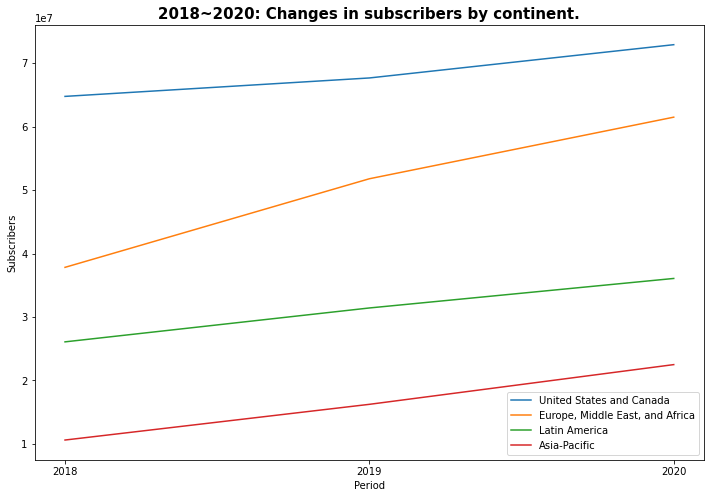

In [152]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=subscriber_df, x=subscriber_df.index, y=subscriber_df['United States and Canada'], label='United States and Canada')
sns.lineplot(data=subscriber_df, x=subscriber_df.index, y=subscriber_df['Europe, Middle East, and Africa'], label='Europe, Middle East, and Africa')
sns.lineplot(data=subscriber_df, x=subscriber_df.index, y=subscriber_df['Latin America'], label='Latin America')
sns.lineplot(data=subscriber_df, x=subscriber_df.index, y=subscriber_df['Asia-Pacific'], label='Asia-Pacific')

plt.legend()
plt.title('2018~2020: Changes in subscribers by continent.', fontsize=15, fontweight='bold')
plt.xlabel('Period')
plt.ylabel('Subscribers')
plt.show()